In [1]:
# python core, numpy, pandas의 시간비교

from datetime import datetime,timedelta
import calendar
today=datetime.now()
yesterday=today-timedelta(days=1)
tomorrow=today+timedelta(days=1)
print("오늘: ",today)
print("어제: ",yesterday)
print("내일: ",tomorrow)
start_day,last_day=calendar.monthrange(today.year,today.month)
print("이달의 마지막 날은",last_day,'입니다.')

오늘:  2023-05-10 01:02:46.107334
어제:  2023-05-09 01:02:46.107334
내일:  2023-05-11 01:02:46.107334
이달의 마지막 날은 31 입니다.


In [235]:
import numpy as np
date=np.array('2015-07-04',dtype=np.datetime64) # 나노초 까지 지원
print(date)
print(date + np.arange(12))

2015-07-04
['2015-07-04' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08'
 '2015-07-09' '2015-07-10' '2015-07-11' '2015-07-12' '2015-07-13'
 '2015-07-14' '2015-07-15']


In [5]:
import pandas as pd
date=pd.to_datetime("12 5,2015") # Timestamp : python core의 데이터 저

date

Timestamp('2015-12-05 00:00:00')

In [6]:
date+ pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-12-05', '2015-12-06', '2015-12-07', '2015-12-08',
               '2015-12-09', '2015-12-10', '2015-12-11', '2015-12-12',
               '2015-12-13', '2015-12-14', '2015-12-15', '2015-12-16'],
              dtype='datetime64[ns]', freq=None)

In [9]:
# range, arange, date_range
range_date=pd.date_range(start='1/1/2019',end='1/08/2019',freq='Min')
print(range_date)

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:01:00',
               '2019-01-01 00:02:00', '2019-01-01 00:03:00',
               '2019-01-01 00:04:00', '2019-01-01 00:05:00',
               '2019-01-01 00:06:00', '2019-01-01 00:07:00',
               '2019-01-01 00:08:00', '2019-01-01 00:09:00',
               ...
               '2019-01-07 23:51:00', '2019-01-07 23:52:00',
               '2019-01-07 23:53:00', '2019-01-07 23:54:00',
               '2019-01-07 23:55:00', '2019-01-07 23:56:00',
               '2019-01-07 23:57:00', '2019-01-07 23:58:00',
               '2019-01-07 23:59:00', '2019-01-08 00:00:00'],
              dtype='datetime64[ns]', length=10081, freq='T')


In [8]:
df=pd.DataFrame(range_date,columns=['date'])
df['data']=np.random.randint(0,100,size=(len(range_date)))
print(df.head(10))

        date  data
0 2019-01-01    98
1 2019-01-02    25
2 2019-01-03    87
3 2019-01-04    91
4 2019-01-05    61
5 2019-01-06    50
6 2019-01-07    80
7 2019-01-08     4


In [11]:
index=pd.DatetimeIndex(['2014-07-04','2014-08-04',
                        '2015-07-04','2015-08-04'])
data=pd.Series([0,1,2,3],index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [12]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [13]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [14]:
pd.date_range('2015-07-03','2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [17]:
pd.date_range('2015-07-03',periods=8) # 8개의 주기, 기본이 D 날짜

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pd.date_range('2015-07-03',periods=8,freq='H') # 개수와 간격을 조정

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [19]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01',periods=5,freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [23]:
# 2000년도를 기준으로 날짜별로 10기간의 인덱스를 생성해보시오
pd.date_range('2000',periods=10,freq='D')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

In [25]:
idx=pd.date_range('2018-01-01',periods=5,freq='H')
ts=pd.Series(range(len(idx)),index=idx)
ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [28]:
# group by-> 중복을 해결하기 위한 함수 적용 
ts.resample('2H').mean() # down sampling

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [29]:
pdtime=pd.Timestamp('2017-03-01')
print(pdtime)
print(type(pdtime))

2017-03-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


<Axes: >

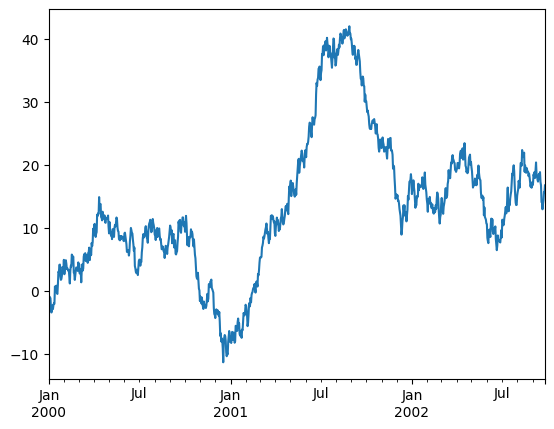

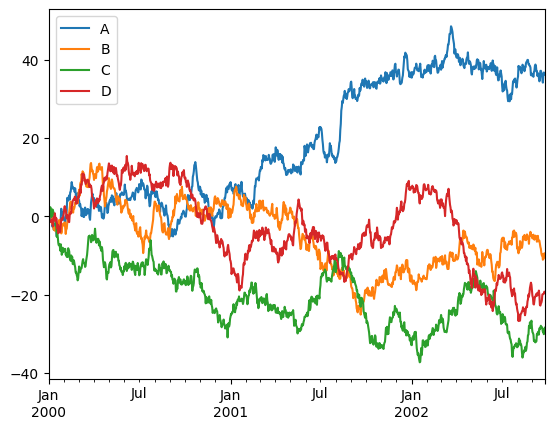

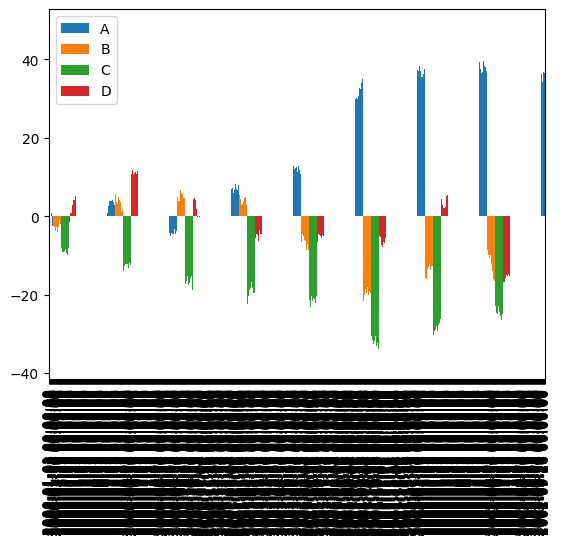

In [30]:
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum() # 누적합( +-)
ts.plot()

df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=list('ABCD'))
df=df.cumsum()
df.plot()
df.plot.bar()

In [32]:
index=pd.date_range('1/1/2000',periods=4,freq='T')
series=pd.Series([0.0,None,2.0,3.0],index=index)
df=pd.DataFrame({'s':series})
df

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:03:00,3.0


In [35]:
df.asfreq(freq='30S',fill_value=9.0)

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,9.0
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,9.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,9.0
2000-01-01 00:03:00,3.0


In [36]:
df.asfreq(freq='30S',method='bfill')

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,2.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,3.0
2000-01-01 00:03:00,3.0


In [37]:
df=pd.DataFrame({'a':[1,2,3,4,5,6],'b':[1,1,2,3,5,8],'c':[1,4,9,16,25,36]})
df.head()

,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25


In [40]:
print(df.diff()) # 자기상관성 : 각 열이 각자 시계열 데이터

     a    b     c
0  NaN  NaN   NaN
1  1.0  0.0   3.0
2  1.0  1.0   5.0
3  1.0  1.0   7.0
4  1.0  2.0   9.0
5  1.0  3.0  11.0


In [41]:
print('축을 열로',df.diff(axis=1))

축을 열로     a  b   c
0 NaN  0   0
1 NaN -1   3
2 NaN -1   7
3 NaN -1  13
4 NaN  0  20
5 NaN  2  28


In [42]:
print(df.diff(periods=3)) # 차분은 연속한 것 뿐만 아니라 lag(시차)
# lag가 periods로 나타남 3칸

     a    b     c
0  NaN  NaN   NaN
1  NaN  NaN   NaN
2  NaN  NaN   NaN
3  3.0  2.0  15.0
4  3.0  4.0  21.0
5  3.0  6.0  27.0


In [45]:
rng=pd.date_range('1/1/2014',periods=12,freq='T')
ts=pd.Series(np.arange(12),index=rng)
print(ts)
print(ts.resample('5min'))
print(ts.resample('5min').ohlc()) # open high low close

2014-01-01 00:00:00     0
2014-01-01 00:01:00     1
2014-01-01 00:02:00     2
2014-01-01 00:03:00     3
2014-01-01 00:04:00     4
2014-01-01 00:05:00     5
2014-01-01 00:06:00     6
2014-01-01 00:07:00     7
2014-01-01 00:08:00     8
2014-01-01 00:09:00     9
2014-01-01 00:10:00    10
2014-01-01 00:11:00    11
Freq: T, dtype: int64
DatetimeIndexResampler [freq=<5 * Minutes>, axis=0, closed=left, label=left, convention=start, origin=start_day]
                     open  high  low  close
2014-01-01 00:00:00     0     4    0      4
2014-01-01 00:05:00     5     9    5      9
2014-01-01 00:10:00    10    11   10     11


In [46]:
res=ts.resample('5min').ohlc()
res['high']

2014-01-01 00:00:00     4
2014-01-01 00:05:00     9
2014-01-01 00:10:00    11
Freq: 5T, Name: high, dtype: int64

In [47]:
ts.resample('5min').sum()

2014-01-01 00:00:00    10
2014-01-01 00:05:00    35
2014-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [48]:
rng=pd.date_range('1/1/2014',periods=100,freq='D')
ts=pd.Series(np.arange(100),index=rng)
print(ts)

2014-01-01     0
2014-01-02     1
2014-01-03     2
2014-01-04     3
2014-01-05     4
              ..
2014-04-06    95
2014-04-07    96
2014-04-08    97
2014-04-09    98
2014-04-10    99
Freq: D, Length: 100, dtype: int64


In [49]:
print(ts.groupby(lambda x:x.month).mean())

1    15.0
2    44.5
3    74.0
4    94.5
dtype: float64


In [50]:
print(ts.groupby(lambda x:x.weekday).mean())

0    50.5
1    51.5
2    49.0
3    50.0
4    47.5
5    48.5
6    49.5
dtype: float64


In [51]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import pandas_datareader.data as web

start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 12, 31)
data=web.DataReader(name='TSLA',data_source='yahoo',start=start_date,end=end_date)
print(data)

TypeError: ignored

In [56]:
df=pd.DataFrame({'B':[0,1,2,np.nan,4]})

In [57]:
df.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


0.4566755695483605


[]

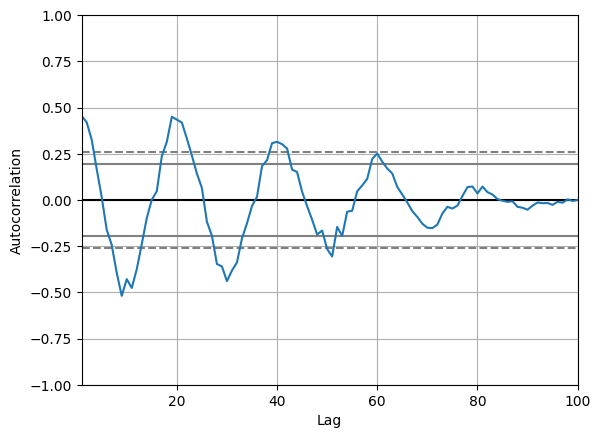

In [61]:
import matplotlib.pyplot as plt
spacing=np.linspace(-5*np.pi,5*np.pi,num=100)
s=pd.Series(0.7*np.random.rand(100)+0.3*np.sin(spacing))
print(s.autocorr())
x=pd.plotting.autocorrelation_plot(s) # 자기 상관성 그래프
x.plot()

In [63]:
np.random.seed(0)
ts=pd.Series(np.random.randn(4),index=pd.date_range(
    '2019-1-1',periods=4,freq='M'))
ts

2019-01-31    1.764052
2019-02-28    0.400157
2019-03-31    0.978738
2019-04-30    2.240893
Freq: M, dtype: float64

In [64]:
ts.shift(1)

2019-01-31         NaN
2019-02-28    1.764052
2019-03-31    0.400157
2019-04-30    0.978738
Freq: M, dtype: float64

In [65]:
ts.shift(-1)

2019-01-31    0.400157
2019-02-28    0.978738
2019-03-31    2.240893
2019-04-30         NaN
Freq: M, dtype: float64

In [67]:
ts/(ts.shift(1)-ts)

2019-01-31         NaN
2019-02-28    0.293393
2019-03-31   -1.691619
2019-04-30   -1.775450
Freq: M, dtype: float64

In [68]:
s=pd.Series([2,3,np.nan,10])
s.rolling(2).sum()

0    NaN
1    5.0
2    NaN
3    NaN
dtype: float64

In [70]:
s=pd.Series([2,3,4,10,11])
s.rolling(3,center=True).mean() # 이동 rolling, window

0         NaN
1    3.000000
2    5.666667
3    8.333333
4         NaN
dtype: float64

In [72]:
# timezone
import pytz
tz=pytz.timezone('Asia/Seoul')
print(tz)
rng=pd.date_range('3/9/2012 9:30',periods=6,freq='Q-DEC')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts_utc=ts.tz_localize('UTC')
print(ts_utc.index)
print(ts.index.tz_localize('Asia/Seoul')) # Business day 휴일 때문에

Asia/Seoul


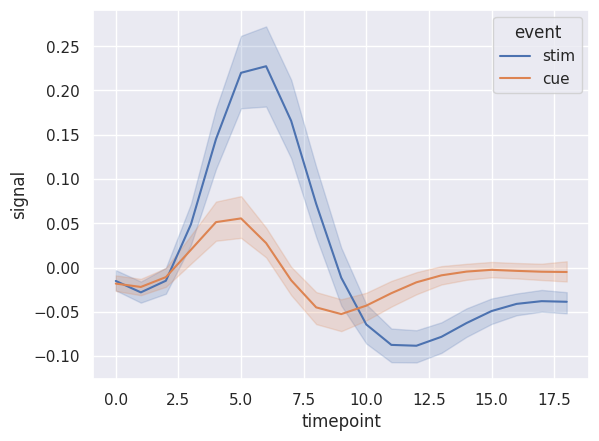

In [74]:
import seaborn as sns; sns.set()
fmri=sns.load_dataset('fmri')
ax=sns.lineplot(x='timepoint',y='signal',hue='event',data=fmri) # tsplot은 사라짐

<Axes: xlabel='timepoint', ylabel='signal'>

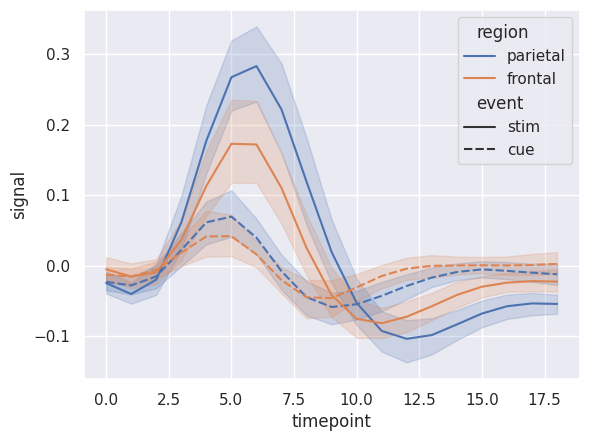

In [75]:
sns.lineplot(x='timepoint',y='signal',hue='region',style='event',data=fmri)

In [76]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.6 MB/s eta 0:00:00


In [79]:
import pandas_datareader as pdr
gs=pdr.get_data_fred('GS10')
print(gs.shape)
print(gs.head())
pdr.nasdaq_trader.get_nasdaq_symbols()

(59, 1)
            GS10
DATE            
2018-06-01  2.91
2018-07-01  2.89
2018-08-01  2.89
2018-09-01  3.00
2018-10-01  3.15


,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Investment Managers Series Trust II AXS First ...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,Z,,True,100.0,False,NaN,AAAU,AAAU,False
AAC,True,Ares Acquisition Corporation Class A Ordinary ...,N,,False,100.0,False,NaN,AAC,AAC,False
...,...,...,...,...,...,...,...,...,...,...,...
ZXYZ.A,True,Nasdaq Symbology Test Common Stock,Q,Q,False,100.0,True,N,NaN,ZXYZ.A,False
ZXZZT,True,NASDAQ TEST STOCK,Q,G,False,100.0,True,N,NaN,ZXZZT,False
ZYME,True,Zymeworks Inc. - Common Stock,Q,Q,False,100.0,False,N,NaN,ZYME,False


In [80]:
pdr.quandl.QuandlReader('078930.KS')

ValueError: ignored

In [82]:
df_krx=fdr.StockListing('NASDAQ')
df_krx.head()

100%|██████████| 4313/4313 [00:32<00:00, 131.24it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,NVDA,NVIDIA Corp,반도체 및 반도체 장비,571010


In [83]:
df_krx=fdr.StockListing('KOSPI')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,64800,2,-500,-0.77,65500,65500,64600,6045662,392267049400,386841909240000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,567000,1,4000,0.71,561000,569000,559000,52827,29880538000,132678000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,87400,1,100,0.11,87200,87700,86500,820027,71551813100,63627406701000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,784000,2,-4000,-0.51,790000,791000,784000,10757,8467420000,55800416000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,716000,2,-6000,-0.83,717000,723000,713000,69877,50144991000,50544117588000,70592343,STK


In [81]:
import FinanceDataReader as fdr
df=fdr.DataReader('AAPL','2017')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133327,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102957,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240786,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544476,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796768,134247600


In [90]:
samsung=fdr.DataReader('005930','2020-1-1','2022-12-31')
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


<Axes: xlabel='Date'>

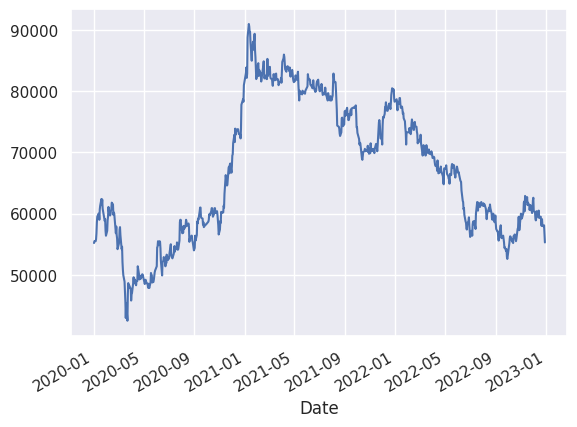

In [88]:
samsung['Close'].plot()

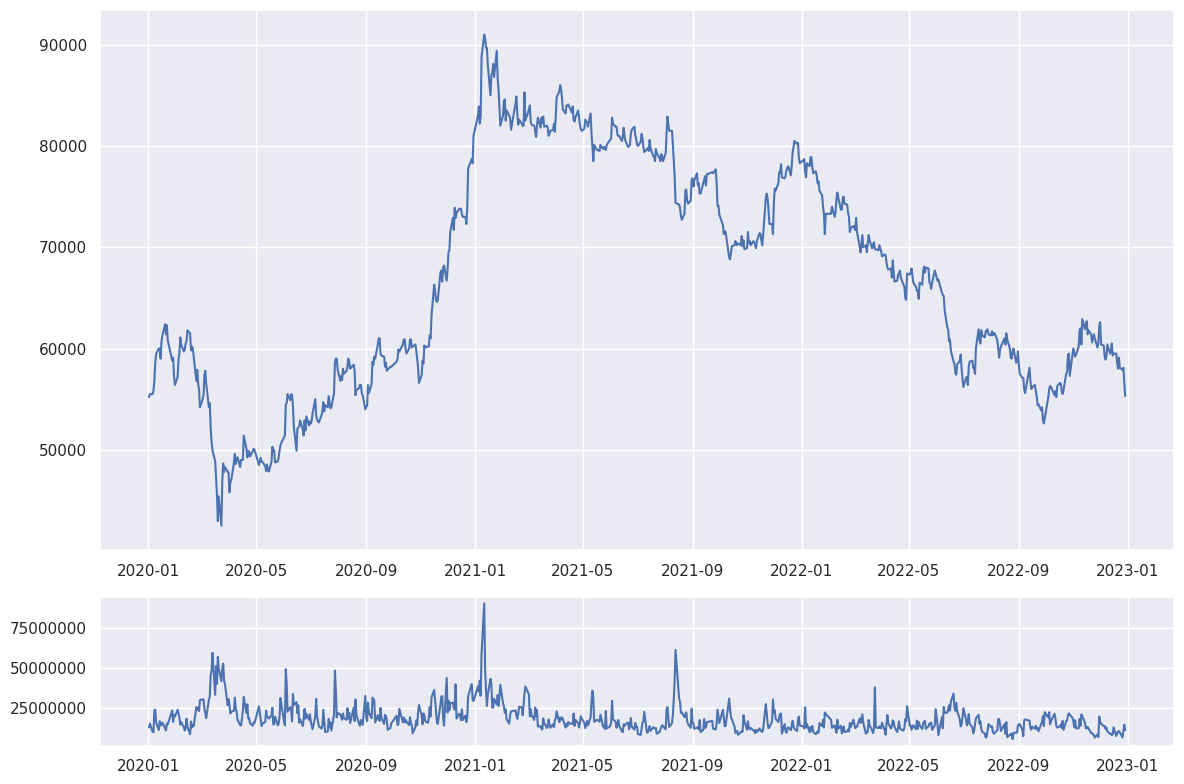

In [91]:
fig=plt.figure(figsize=(12,8)) # 그래픽 관리자
# 화면 분할
top_axes=plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4) # 도화지
bottom_axes=plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
top_axes.plot(samsung.index,samsung['Close'],label='Adjusted Close') # 종가 그래프 
bottom_axes.plot(samsung.index,samsung['Volume']) # 매매량

plt.tight_layout()
plt.show()

In [95]:
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
# 봉차트
import matplotlib.ticker as ticker
import mpl_finance as matfin

start=datetime(2019,3,1)
end=datetime(2019,3,31)
hynix=fdr.DataReader('000660',start,end)
print(hynix.head(10))

             Open   High    Low  Close   Volume    Change
Date                                                     
2019-03-04  70300  71400  69900  70100  4931703  0.001429
2019-03-05  68300  70000  68300  69700  3465521 -0.005706
2019-03-06  68500  69600  67400  68100  4958303 -0.022956
2019-03-07  67200  68900  67100  68100  3402570  0.000000
2019-03-08  67900  68200  66200  66700  3571792 -0.020558
2019-03-11  67000  67800  66200  66600  2869008 -0.001499
2019-03-12  67700  68600  67500  67700  2753535  0.016517
2019-03-13  67700  67800  65900  66800  2851596 -0.013294
2019-03-14  67400  67400  66400  67300  3107100  0.007485
2019-03-15  67400  68700  66700  68100  3645592  0.011887


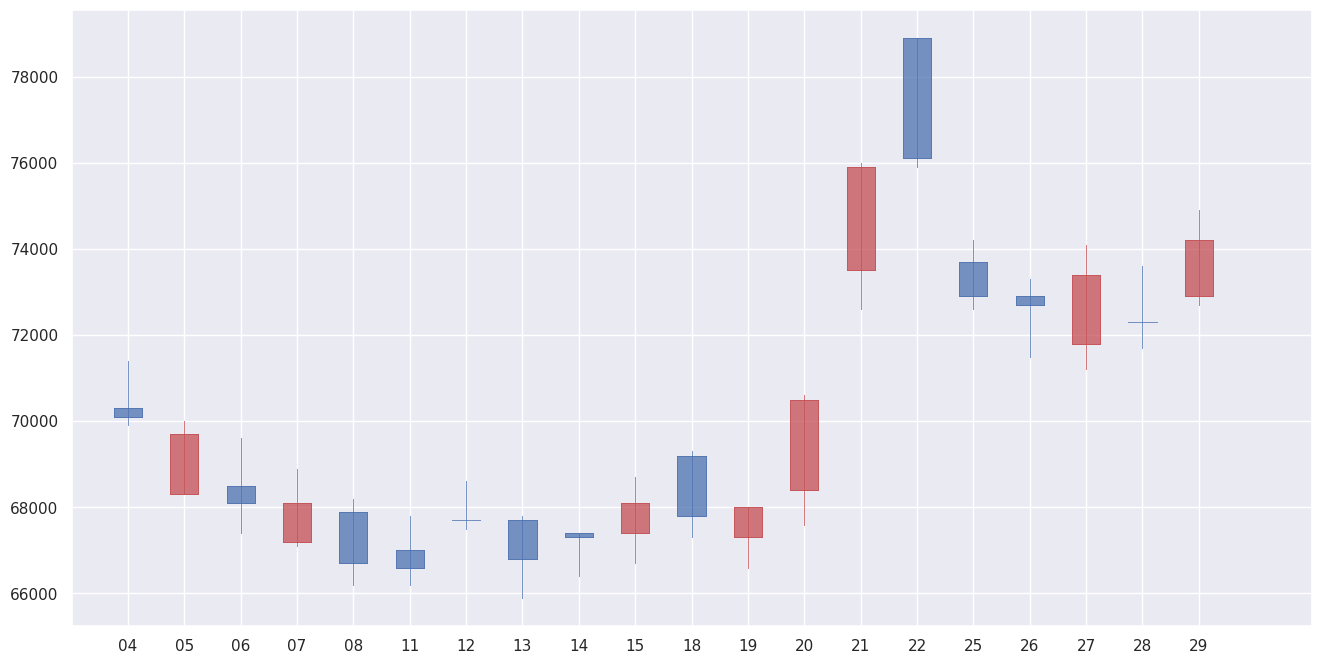

In [100]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
day_list=range(len(hynix))
name_list=[]
for day in hynix.index:
  name_list.append(day.strftime('%d'))
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))
matfin.candlestick2_ohlc(ax,hynix['Open'],hynix['High'],hynix['Low'],hynix['Close'],width=0.5,colorup='r',colordown='b')
plt.show()

In [101]:
tiker_list=['AAPL','MSFT','AMZN']
df_list=[fdr.DataReader(ticker,'2010-01-01','2016-12-31')['Close']
         for ticker in tiker_list]
panel_data = pd.concat(df_list,axis=1)
panel_data.columns=['AAPL','MSFT','AMZN']
panel_data=panel_data.dropna()
panel_data.head(10)
close=panel_data
close.head(10)

,AAPL,MSFT,AMZN
Date,,,
2010-01-04,7.643214,30.950001,6.6950
2010-01-05,7.656429,30.959999,6.7345
2010-01-06,7.534643,30.770000,6.6125
2010-01-07,7.520714,30.450001,6.5000
2010-01-08,7.570714,30.660000,6.6760
2010-01-11,7.503929,30.270000,6.5155
2010-01-12,7.418571,30.070000,6.3675
2010-01-13,7.523214,30.350000,6.4555
2010-01-14,7.479643,30.959999,6.3675


In [102]:
# 마이크로 소프트의 20일 이평과 60일 이평을 계산하시오
print(panel_data['MSFT'])

Date
2010-01-04    30.950001
2010-01-05    30.959999
2010-01-06    30.770000
2010-01-07    30.450001
2010-01-08    30.660000
                ...    
2016-12-23    63.240002
2016-12-27    63.279999
2016-12-28    62.990002
2016-12-29    62.900002
2016-12-30    62.139999
Name: MSFT, Length: 1762, dtype: float64


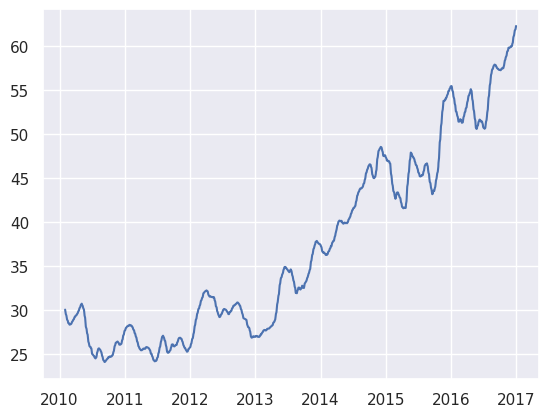

In [111]:
panel_data['MSFT'].rolling(window=20).mean().dropna()

plt.plot(panel_data['MSFT'].rolling(window=20).mean().dropna())
plt.show()

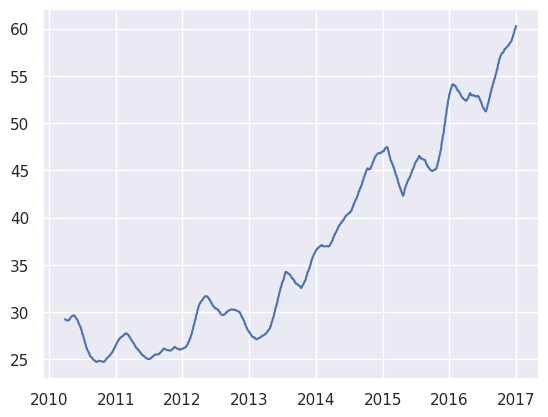

In [110]:
panel_data['MSFT'].rolling(window=60).mean()
plt.plot(panel_data['MSFT'].rolling(window=60).mean())
plt.show()

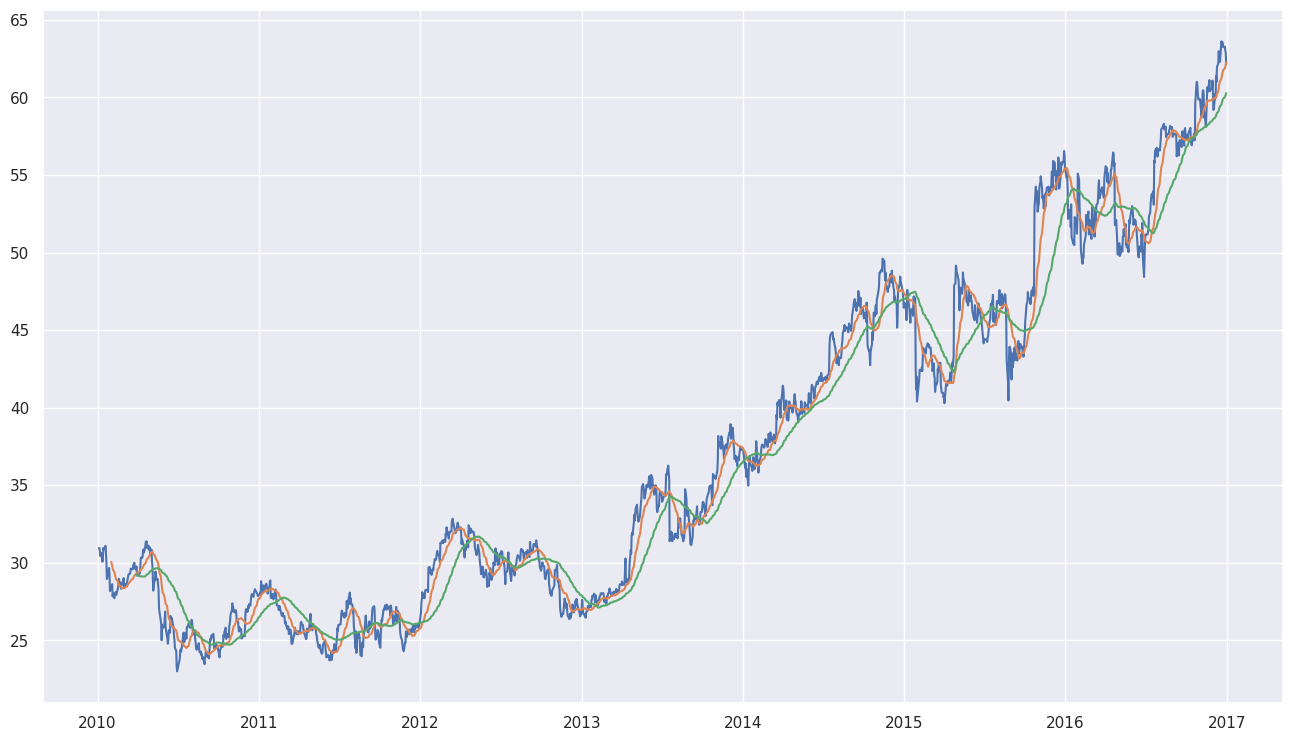

In [112]:
# MS 20일 이평과 60일 이평을 계산하시요 이동평균선
msft = close.loc[:, 'MSFT']
short_rolling_msft = msft.rolling(window=20).mean() 
long_rolling_msft = msft.rolling(window=60).mean()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='60 days')
plt.show()

In [ ]:
import seaborn as sns
sns.set(style='darkgrid',context='talk',palette='Dark2')

In [113]:
path='/content/drive/MyDrive/daejeon_1/stock_px.csv'
data=pd.read_csv(path,parse_dates=True,index_col=0)
data.head(10)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [114]:
short_rolling=data.rolling(window=20).mean()
short_rolling.head(20)

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN,NaN
2003-01-09,NaN,NaN,NaN,NaN
2003-01-10,NaN,NaN,NaN,NaN
2003-01-13,NaN,NaN,NaN,NaN
2003-01-14,NaN,NaN,NaN,NaN
2003-01-15,NaN,NaN,NaN,NaN


In [115]:
long_rolling=data.rolling(window=100).mean()
long_rolling.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,365.9714,25.4844,76.8438,1242.5304
2011-10-11,366.5690,25.5088,76.7886,1241.0498
2011-10-12,367.2387,25.5350,76.7499,1239.7896
2011-10-13,367.9790,25.5666,76.7122,1238.6525
2011-10-14,368.8771,25.5993,76.6857,1237.7355


In [116]:
data.shape

(2214, 4)

In [117]:
returns=data.pct_change(1) # 
returns.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086


In [118]:
log_returns=np.log(data).diff() # 비정상성의 데이터를 정상성 데이터로
log_returns.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006734,0.001420,0.000684,-0.000484
2003-01-06,0.000000,0.017816,0.024326,0.022226
2003-01-07,-0.002688,0.018873,-0.034293,-0.006566
2003-01-08,-0.020395,-0.028679,-0.004154,-0.014186


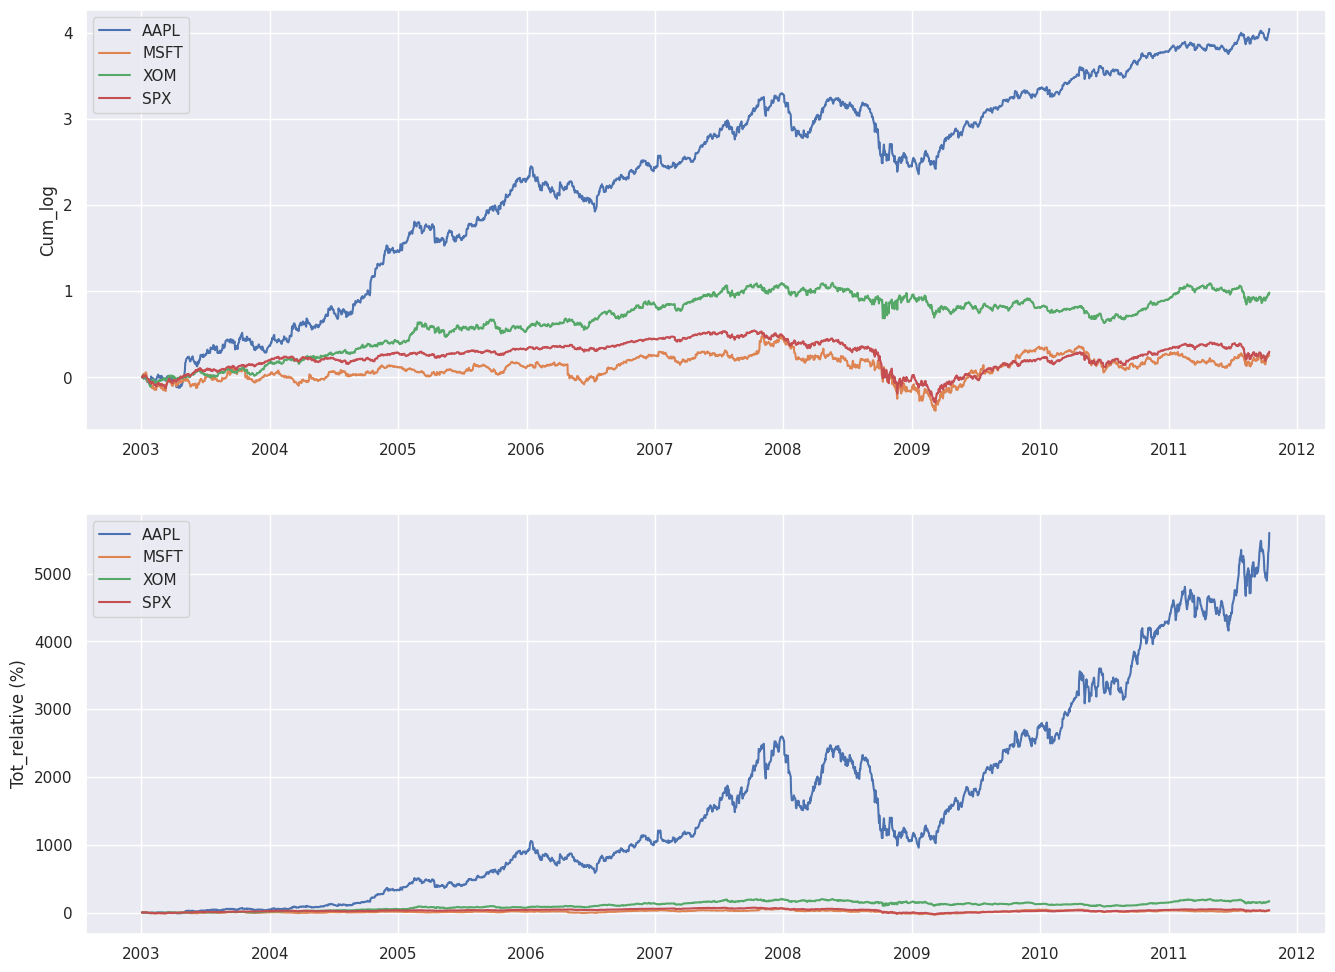

In [119]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(16,12))
for c in log_returns:
  ax1.plot(log_returns.index,log_returns[c].cumsum(),label=str(c))
ax1.set_ylabel('Cum_log')
ax1.legend(loc='best')
for c in log_returns:
  ax2.plot(log_returns.index,100*(np.exp(log_returns[c].cumsum())-1),
           label=str(c))
ax2.set_ylabel('Tot_relative (%)')
ax2.legend(loc='best')
plt.show()

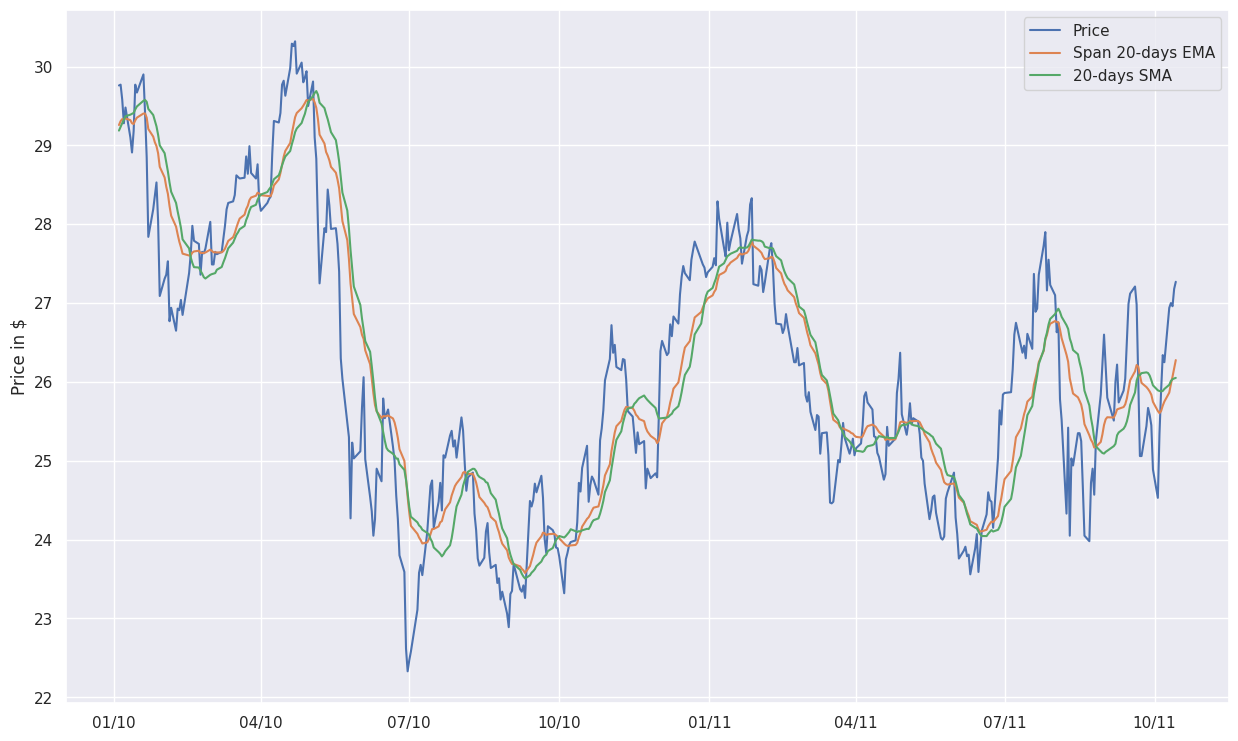

In [130]:
# 지수 가중 이동
import matplotlib.dates as mdates

my_year_month_fmt = mdates.DateFormatter('%m/%y')
start_date = '2010-01-02'
end_date = '2018-10-14'
ema_short = data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize = (15,9))
ax.plot(data.loc[start_date:end_date,:].index, data.loc[start_date:end_date,'MSFT'], label='Price')
ax.plot(ema_short.loc[start_date:end_date,:].index, ema_short.loc[start_date:end_date,'MSFT'], label='Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date,:].index, short_rolling.loc[start_date:end_date, 'MSFT'], label='20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [ ]:
# # 지수 가중 이동법(ewm)과 20일 이평
# import matplotlib.dates as mdates
# my_year_month_fmt = mdates.DateFormatter('%m/%y')
# start_date='2010-01-02'
# end_date='2018-10-14'
# ema_short=data.ewm(span=20,adjust=False).mean()

# fig,ax=plt.subplots(figsize=(15,9))
# ax.plot(data.loc[start_date:end_date,:].index,data.loc[start_date:end_date,
#                                                        'MSFT'],label='Price')
# ax.plot(ema_short.loc[start_date:end_date,:].index,ema_short.loc[start_date:end_date,
#                                                                  'MSFT'],label='Span 20-days EMA')
# ax.plot(short_rolling.loc[start_date:end_date,:].config(),
#         short_rolling.loc[start_date:end_date,'MSFT'],label='20-days SMA')

# ax.legend(loc='best')
# ax.set_ylabel('Price in $')
# ax.xaxis.set_major_formatter(my_year_month_fmt)

In [124]:
trading_positions_raw=data-ema_short
trading_positions_raw.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,2.761032,1.075701,3.156261,33.142519
2011-10-11,12.884743,1.027539,2.846617,30.574184
2011-10-12,13.376672,0.893487,3.380749,38.257119
2011-10-13,17.748418,1.007441,2.344011,31.365488
2011-10-14,28.335711,0.992923,3.695057,47.305918


In [127]:
# 부호로 판단
trading_positions=trading_positions_raw.apply(np.sign)*1/3
trading_positions

,AAPL,MSFT,XOM,SPX
2003-01-02,0.000000,0.000000,0.000000,0.000000
2003-01-03,0.333333,0.333333,0.333333,-0.333333
2003-01-06,0.333333,0.333333,0.333333,0.333333
2003-01-07,0.333333,0.333333,-0.333333,0.333333
2003-01-08,-0.333333,0.333333,-0.333333,-0.333333
...,...,...,...,...
2011-10-10,0.333333,0.333333,0.333333,0.333333
2011-10-11,0.333333,0.333333,0.333333,0.333333
2011-10-12,0.333333,0.333333,0.333333,0.333333
2011-10-13,0.333333,0.333333,0.333333,0.333333


In [126]:
# 부호가 바뀌고 첫 거래에서 매매
trading_positions_final=trading_positions.shift(1)

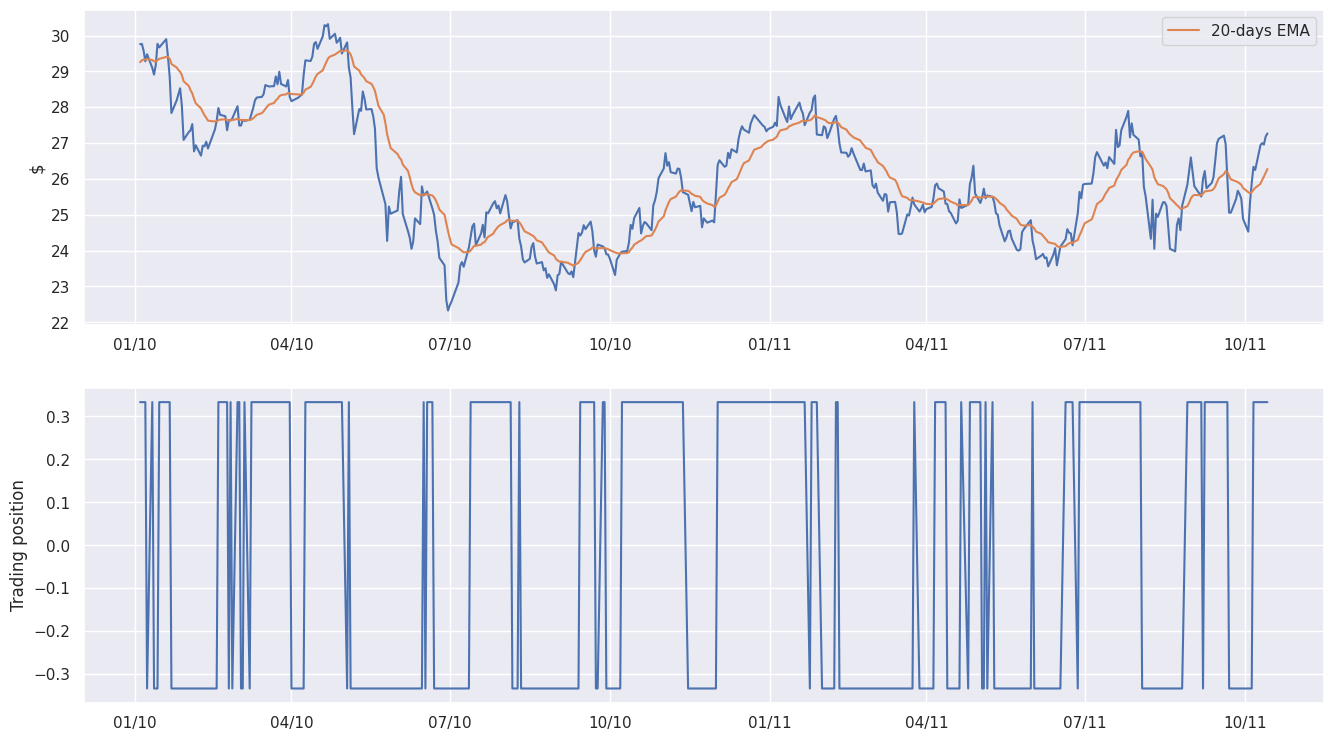

In [129]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(16,9))
ax1.plot(data.loc[start_date:end_date,:].index,data.loc[start_date:end_date,'MSFT'])
ax1.plot(ema_short.loc[start_date:end_date,:].index,
         ema_short.loc[start_date:end_date,'MSFT'],label='20-days EMA')
ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)
ax2.plot(trading_positions_final.loc[start_date:end_date,:].index,
         trading_positions_final.loc[start_date:end_date,'MSFT'],
         label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [143]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas import Series
from datetime import datetime
path='/content/drive/MyDrive/daejeon_1/austr.csv'
df=pd.read_csv(path,parse_dates=['Month']) # 열지정
df
# 문제
# 'Monthly beer production' -> 'M_beer_Prod' 로 바꾸기
df.rename(columns={'Month':'month','Monthly beer production': 'M_beer_Prod'}, inplace=True)
print(df)

         month  M_beer_Prod
0   1956-01-01         93.2
1   1956-02-01         96.0
2   1956-03-01         95.2
3   1956-04-01         77.1
4   1956-05-01         70.9
..         ...          ...
471 1995-04-01        127.0
472 1995-05-01        151.0
473 1995-06-01        130.0
474 1995-07-01        119.0
475 1995-08-01        153.0

[476 rows x 2 columns]


<Axes: >

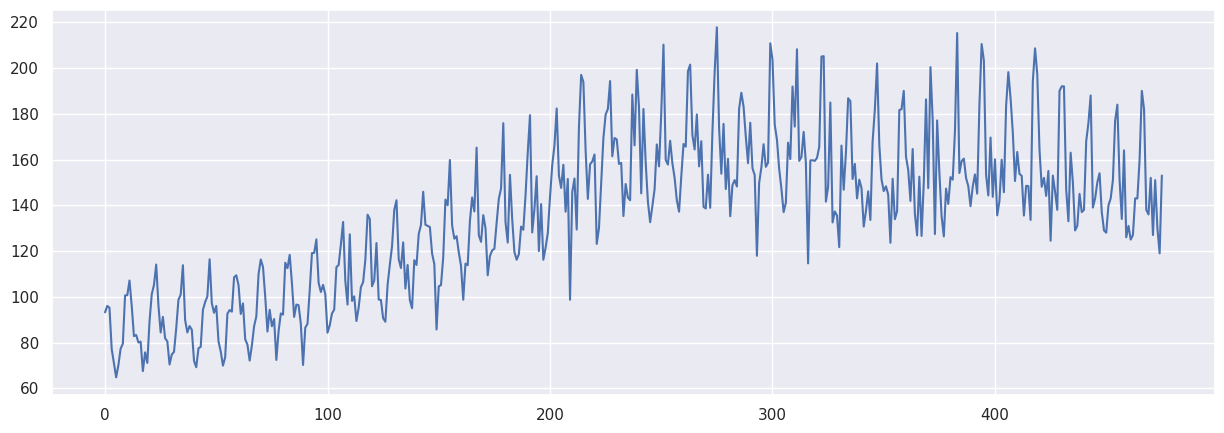

In [144]:
plt.figure(figsize=(15,5))
df['M_beer_Prod'].plot()

<Axes: xlabel='months'>

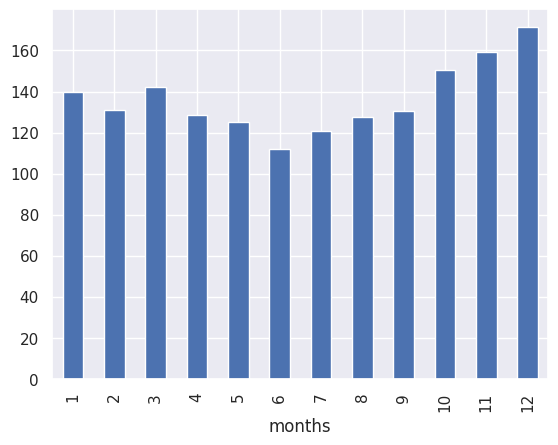

In [149]:
# 월별로 제품의 평균을 시각화
df['Day']=df.month.dt.day
df['Year']=df.month.dt.year
df['months']=df.month.dt.month

df.groupby(df['months'])['M_beer_Prod'].mean().plot.bar()

<Axes: xlabel='Year'>

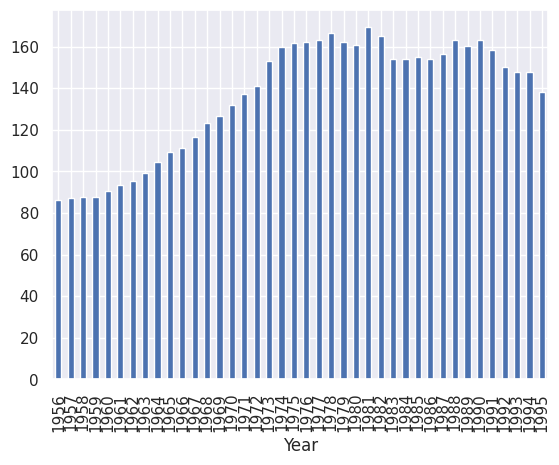

In [150]:
df.groupby(df['Year'])['M_beer_Prod'].mean().plot.bar()

<Axes: xlabel='Year', ylabel='M_beer_Prod'>

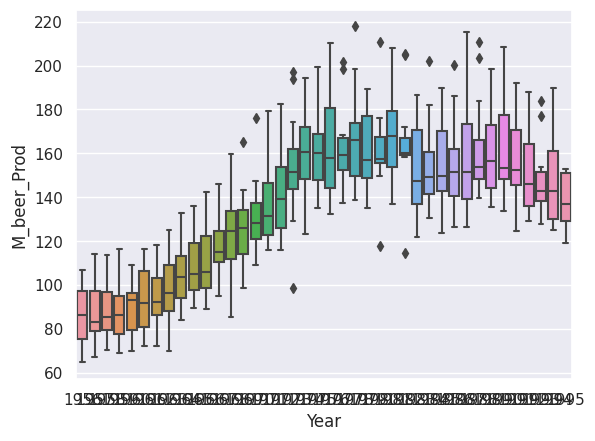

In [151]:
sns.boxplot(x=df.Year,y=df['M_beer_Prod'])

In [152]:
df.Timestamp=pd.to_datetime(df.month)
df.index=df.Timestamp
df=df.resample('M').mean()

<ipython-input-152-5f7f94de0160>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Timestamp=pd.to_datetime(df.month)
<ipython-input-152-5f7f94de0160>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.resample('M').mean()


In [153]:
df.head()

,M_beer_Prod,Day,Year,months
month,,,,
1956-01-31,93.2,1.0,1956.0,1.0
1956-02-29,96.0,1.0,1956.0,2.0
1956-03-31,95.2,1.0,1956.0,3.0
1956-04-30,77.1,1.0,1956.0,4.0
1956-05-31,70.9,1.0,1956.0,5.0


In [154]:
len(df)*0.7

333.2

In [156]:
train=df.iloc[0:333]
valid=df.iloc[333:]

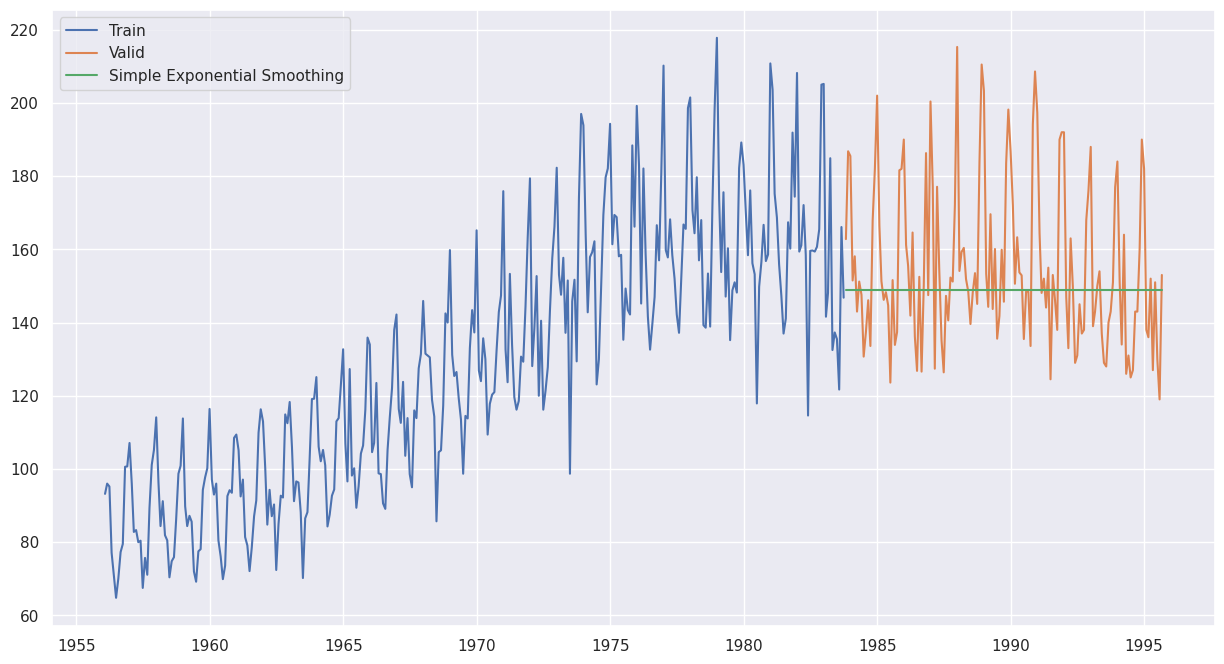

In [157]:
from statsmodels.tsa.api import SimpleExpSmoothing
y_hat=valid.copy()
# 적합한다
# hyper parameter -> optimization의 대상 (test 되었다.)
# hyper parameter tuning
# series -> ndarray로 바꿔라 (statsmodels : ndarray기반 )
fit=SimpleExpSmoothing(np.asarray(train['M_beer_Prod'])).fit(smoothing_level=0.8,optimized=False)
y_hat['SES']=fit.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(train['M_beer_Prod'],label='Train')
plt.plot(valid['M_beer_Prod'],label='Valid')
plt.plot(y_hat["SES"],label='Simple Exponential Smoothing')
plt.legend(loc='best')

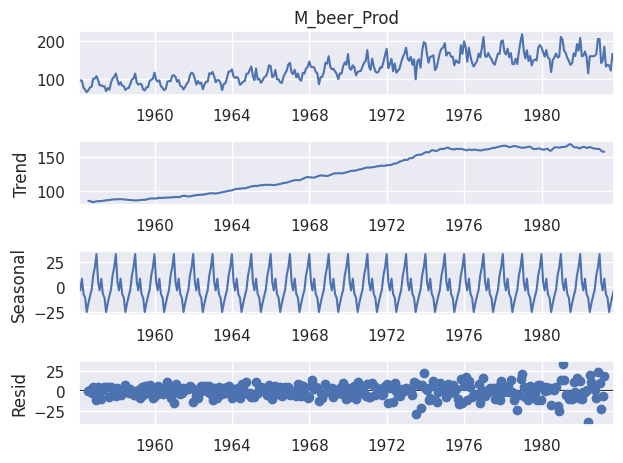

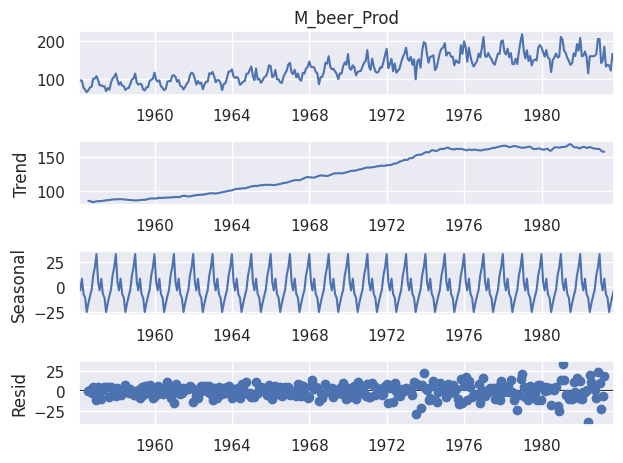

In [158]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['M_beer_Prod']).plot()
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(train['M_beer_Prod']).plot()
plt.show()

<ipython-input-159-8e3fe91ef696>:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1=Holt(np.asarray(train['M_beer_Prod']),damped=True).fit(smoothing_level=0.1,smoothing_slope=0.02)
<ipython-input-159-8e3fe91ef696>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1=Holt(np.asarray(train['M_beer_Prod']),damped=True).fit(smoothing_level=0.1,smoothing_slope=0.02)


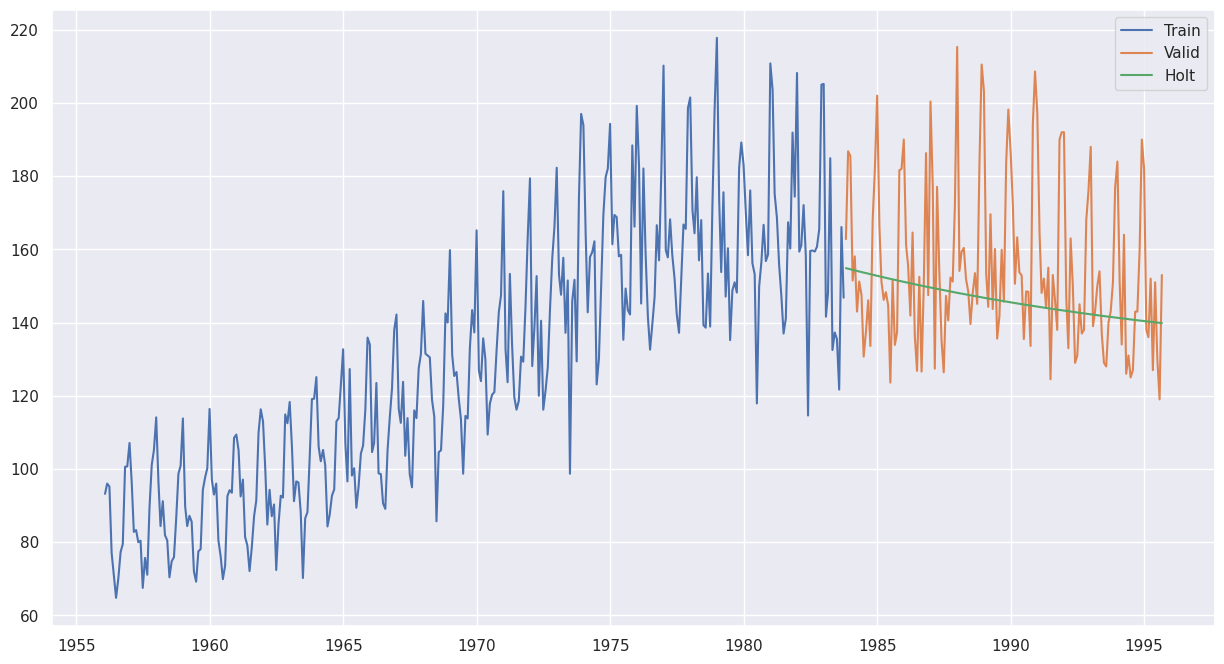

In [159]:
# holtwinters = simple + 계절성을 고려하는 모델
from statsmodels.tsa.holtwinters import Holt
y_hat=valid.copy()
fit1=Holt(np.asarray(train['M_beer_Prod']),damped=True).fit(smoothing_level=0.1,smoothing_slope=0.02)
y_hat['Holt선형모델']=fit1.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(train['M_beer_Prod'],label='Train')
plt.plot(valid['M_beer_Prod'],label='Valid')
plt.plot(y_hat['Holt선형모델'],label='Holt')
plt.legend(loc='best')

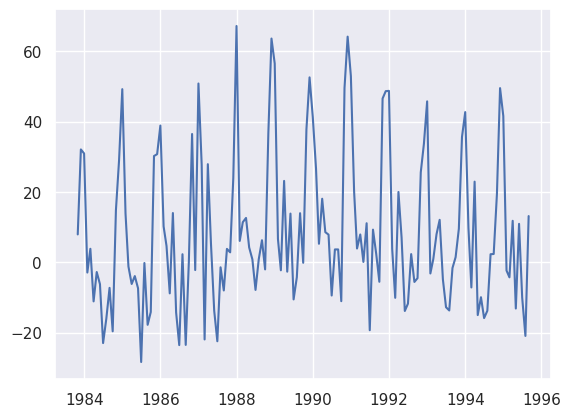

In [160]:
# 문제
# 잔차(residual)을 구하시오
residual=valid['M_beer_Prod']-y_hat['Holt선형모델']
plt.plot(residual)
plt.show()

In [161]:
# root mean square error
rmse=np.sqrt(mean_squared_error(valid['M_beer_Prod'],y_hat['Holt선형모델']))
rmse

23.074874052848156

<ipython-input-164-8fabbbaa1f29>:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit2=ExponentialSmoothing(np.asarray(train['M_beer_Prod']),trend='add',


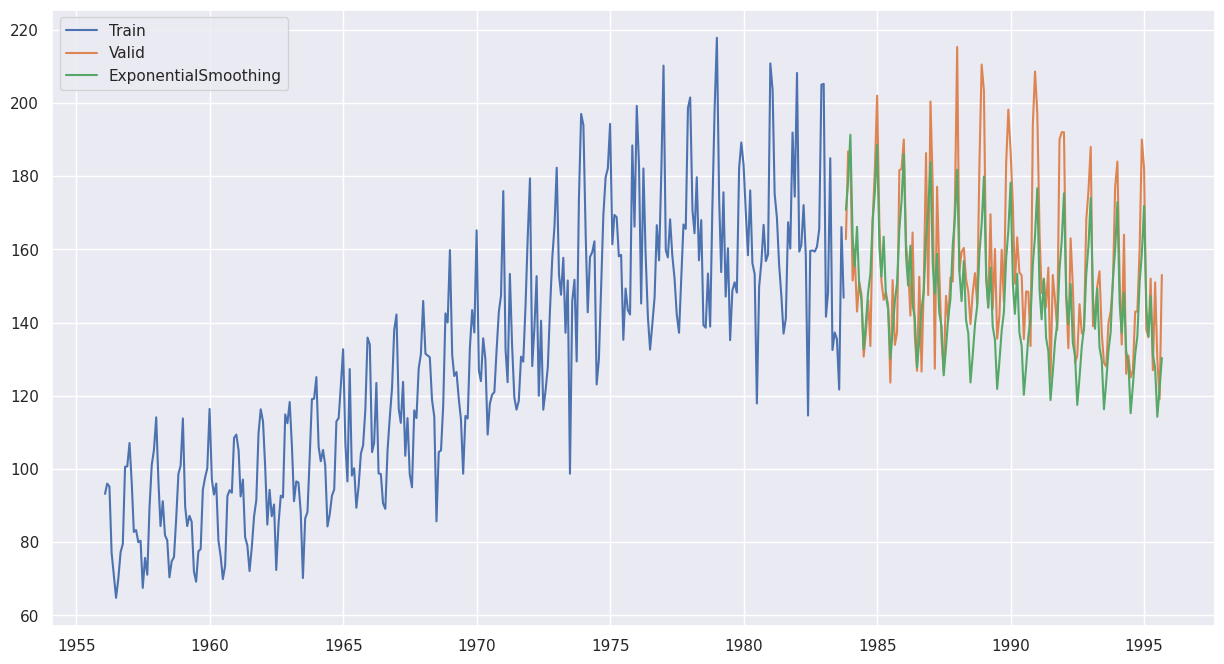

In [164]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat=valid.copy()
fit2=ExponentialSmoothing(np.asarray(train['M_beer_Prod']),trend='add',
                          damped=True,seasonal='add',seasonal_periods=12).fit()
y_hat['HS']=fit2.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(train['M_beer_Prod'],label='Train')
plt.plot(valid['M_beer_Prod'],label='Valid')
plt.plot(y_hat['HS'],label='ExponentialSmoothing')
plt.legend(loc='best')

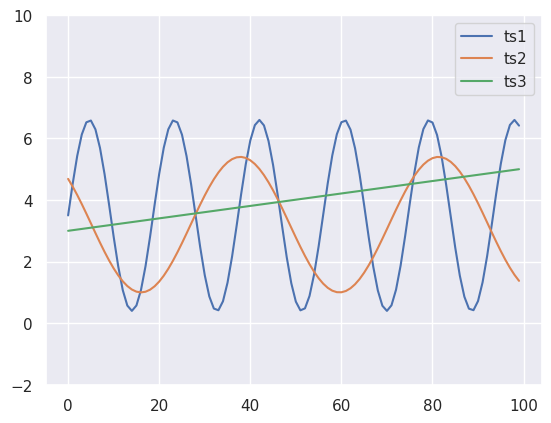

In [166]:
# DTW ( dynamic time warping)
x=np.linspace(0,50,100)
ts1=pd.Series(3.1*np.sin(x/1.5)+3.5)
ts2=pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3=pd.Series(0.04*x+3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2,10)
plt.legend(['ts1','ts2','ts3'])
plt.show()

In [170]:
def euclid_dist(t1,t2):
  return np.sqrt(sum((t1-t2)**2))

In [172]:
print(euclid_dist(ts1,ts2))
print(euclid_dist(ts1,ts3))

26.959216037969345
23.189249190311056


In [173]:
def DTWDistance(s1,s2):
  DTW={}
  for i in range(len(s1)):
    DTW[(i,-1)]=float('inf')
  for i in range(len(s2)):
    DTW[(-1,i)]=float('inf')
  DTW[(-1,-1)]=0

  for i in range(len(s1)):
    for j in range(len(s2)):
      dist=(s1[i]-s2[j])**2 # 거리값 - 유클리디안거리 
      DTW[(i,j)]=dist+min(DTW[(i-1,j)],DTW[(i,j-1)],DTW[(i-1,j-1)])
  return np.sqrt(DTW[len(s1)-1,len(s2)-1])

In [174]:
print(DTWDistance(ts1,ts2))
print(DTWDistance(ts1,ts3))
print(DTWDistance(ts2,ts3))

17.929718468641138
21.549494824404572
14.846846666395088


In [232]:
path='/content/drive/MyDrive/daejeon_1/sales.csv'
sales=pd.read_csv(path)
print(sales)
print(sales.shape)
sales.dtypes

   Customer Number     Customer Name         2016          2017  \
0          10002.0  Quest Industries  $125,000.00    $162500.00   
1         552278.0    Smith Plumbing  $920,000.00  $101,2000.00   
2          23477.0   ACME Industrial   $50,000.00     $62500.00   
3          24900.0        Brekke LTD  $350,000.00    $490000.00   
4         651029.0         Harbor Co   $15,000.00     $12750.00   

  Percent Growth Jan Units  Month  Day  Year Active  
0         30.00%       500      1   10  2015      Y  
1         10.00%       700      6   15  2014      Y  
2         25.00%       125      3   29  2016      Y  
3          4.00%        75     10   27  2015      Y  
4        -15.00%    Closed      2    2  2014      N  
(5, 10)


Customer Number    float64
Customer Name       object
2016                object
2017                object
Percent Growth      object
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

In [233]:
# sales 데이터 로딩하고 다음처리하시오
# 'Customer Number'를 int형으로 처리
sales['Customer Number']=sales['Customer Number'].astype(int)
# df['Jan Units']를 int형으로 처리
# print(sales['Jan Units'].apply(lambda x:isinstance(x,str)).any())
sales['Jan Units'] = pd.to_numeric(sales['Jan Units'], errors='coerce').fillna(0).astype(int)
# '2016' 데이터를 float형으로 처리
sales['2016']=sales['2016'].apply(lambda x:x.replace('$','').replace(',','')).astype(float)
# 숫자 데이터에 들어있는 ,와 $ 제거
sales['2017']=sales['2017'].apply(lambda x:x.replace('$','').replace(',','')).astype(float)
# 수치형 데이터중 %를 수치로 바꾸기(문자를 떼고 100으로 나누기 )
sales['Percent Growth']=sales['Percent Growth'].apply(lambda x:float(x.replace('%','')))/100
# Active를 True/False로 변경하시오 (boolean값)
sales['Active']=sales['Active'].apply(lambda x: True if x == 'Y' else False)


   Customer Number     Customer Name      2016       2017  Percent Growth  \
0            10002  Quest Industries  125000.0   162500.0            0.30   
1           552278    Smith Plumbing  920000.0  1012000.0            0.10   
2            23477   ACME Industrial   50000.0    62500.0            0.25   
3            24900        Brekke LTD  350000.0   490000.0            0.04   
4           651029         Harbor Co   15000.0    12750.0           -0.15   

   Jan Units  Month  Day  Year  Active  
0        500      1   10  2015    True  
1        700      6   15  2014    True  
2        125      3   29  2016    True  
3         75     10   27  2015    True  
4          0      2    2  2014   False  


In [234]:
print(sales)
print(sales.dtypes)

   Customer Number     Customer Name      2016       2017  Percent Growth  \
0            10002  Quest Industries  125000.0   162500.0            0.30   
1           552278    Smith Plumbing  920000.0  1012000.0            0.10   
2            23477   ACME Industrial   50000.0    62500.0            0.25   
3            24900        Brekke LTD  350000.0   490000.0            0.04   
4           651029         Harbor Co   15000.0    12750.0           -0.15   

   Jan Units  Month  Day  Year  Active  
0        500      1   10  2015    True  
1        700      6   15  2014    True  
2        125      3   29  2016    True  
3         75     10   27  2015    True  
4          0      2    2  2014   False  
Customer Number      int64
Customer Name       object
2016               float64
2017               float64
Percent Growth     float64
Jan Units            int64
Month                int64
Day                  int64
Year                 int64
Active                bool
dtype: object


In [238]:
# 수업내용
def convert_currency(val):
    new_val = val.replace(',','').replace('$','')
    return new_val

def convert_percent(val):
    new_val = val.replace('%', '')
    return float(new_val)/100

df_2=pd.read_csv('/content/drive/MyDrive/daejeon_1/sales.csv',
                 dtype={'Customer Number':'int'},
                 converters={'2016':convert_currency,
                             '2017':convert_currency,
                             'Percent Growth':convert_percent,
                             'Jan Units':lambda x:pd.to_numeric(x,errors='coerce'),
                             'Active':lambda x:np.where(x=='Y',True,False)})

print(df_2)

   Customer Number     Customer Name       2016        2017  Percent Growth  \
0            10002  Quest Industries  125000.00   162500.00            0.30   
1           552278    Smith Plumbing  920000.00  1012000.00            0.10   
2            23477   ACME Industrial   50000.00    62500.00            0.25   
3            24900        Brekke LTD  350000.00   490000.00            0.04   
4           651029         Harbor Co   15000.00    12750.00           -0.15   

   Jan Units  Month  Day  Year Active  
0      500.0      1   10  2015   True  
1      700.0      6   15  2014   True  
2      125.0      3   29  2016   True  
3       75.0     10   27  2015   True  
4        NaN      2    2  2014  False  
